<a href="https://colab.research.google.com/github/kunj2511/project/blob/main/Harsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mahotas
import mahotas as mt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import pandas as pd
from matplotlib import pyplot as pyplot

from google.colab import drive
drive.mount('/content/drive/')
 
ds_path = "/content/drive/My Drive/Colab Notebooks/Tomato___healthy"
img_files = os.listdir(ds_path)
for i in range(1,len(img_files)):
    if str(i)+".jpg" in img_files:
       print(i)
    else:
       print(False)

In [ ]:
def create_dataset():
    names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    for i in range(1,len(img_files)):
      for file in img_files:
        if str(i)+".jpg"==file:
          imgpath = ds_path + "//" + file
          main_img = cv2.imread(imgpath)
          if main_img is not None:
            
            #Preprocessing
            img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
            gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            blur = cv2.GaussianBlur(gs, (25,25),0)
            ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            kernel = np.ones((50,50),np.uint8)
            closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
            
            #Shape features
            contours,image  = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            contours=sorted(contours,key=cv2.contourArea,reverse=True)
            cnt = contours[0]
            M = cv2.moments(np.float32(cnt))
            area = cv2.contourArea(contours[0])
            perimeter = cv2.arcLength(cnt,True)
            x,y,w,h = cv2.boundingRect(cnt)
            aspect_ratio = float(w)/h
            rectangularity = w*h/area
            circularity = ((perimeter)**2)/area
            
            #Color features
            red_channel = img[:,:,0]
            green_channel = img[:,:,1]
            blue_channel = img[:,:,2]
            blue_channel[blue_channel == 255] = 0
            green_channel[green_channel == 255] = 0
            red_channel[red_channel == 255] = 0
            
            red_mean = np.mean(red_channel)
            green_mean = np.mean(green_channel)
            blue_mean = np.mean(blue_channel)
          
            red_std = np.std(red_channel)
            green_std = np.std(green_channel)
            blue_std = np.std(blue_channel)
            
            #Texture features
            textures = mt.features.haralick(gs)
            ht_mean = textures.mean(axis=0)
            contrast = ht_mean[1]
            correlation = ht_mean[2]
            inverse_diff_moments = ht_mean[4]
            entropy = ht_mean[8]
            
            vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                      red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                      contrast,correlation,inverse_diff_moments,entropy
                    ]
            
            df_temp = pd.DataFrame([vector],columns=names)
            df = df.append(df_temp)
            print(file)
          
    return df
dataset = create_dataset()
dataset.to_csv("/content/drive/My Drive/Colab Notebooks/Flavia_features.csv")


In [ ]:
dataset.to_csv("/content/drive/My Drive/Colab Notebooks/Flavia_features.csv")
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Flavia_features.csv")
dataset.head(5)
type(dataset)
maindir = r'/content/drive/My Drive/Colab Notebooks/'
ds_path = maindir + "/Tomato___healthy"
old_img_files = os.listdir(ds_path)
print(len(old_img_files))

img_files=[]
for i in range(1,len(old_img_files)):
    if str(i)+".jpg" in old_img_files:
       img_files.append(str(i)+".jpg")
    else:
       print(False)
print(img_files)
print(len(img_files))

1273
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg', '1

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1272)
print(len(X))
print(len(y))

1272
1272


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[:5, :])
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[:5, :])

[[ -4.99492706  -9.87617807]
 [ -4.69885277 -10.92276227]
 [ -4.85355744  -9.13544298]
 [ -8.57951389   5.38446684]
 [  3.66585741  -6.13995588]]
[[ -4.99492706  -9.87617807]
 [ -4.69885277 -10.92276227]
 [ -4.85355744  -9.13544298]
 [ -8.57951389   5.38446684]
 [  3.66585741  -6.13995588]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(y_pred)

[2 2 2 0 1 0 1 0 2 2 2 2 0 2 1 1 0 0 2 2 0 0 0 1 0 1 2 1 2 0 2 1 2 2 2 0 0
 1 2 1 2 0 2 1 2 0 0 0 0 0 1 0 2 0 0 0 2 1 0 0 1 1 1 2 0 1 2 0 1 0 2 0 2 1
 1 0 0 2 2 1 2 0 0 1 1 1 2 2 0 1 0 2 2 0 1 1 2 1 2 0 0 1 2 0 2 0 1 2 1 2 1
 0 1 1 1 2 1 2 2 1 2 0 2 0 1 0 0 2 0 2 0 2 0 2 2 1 0 2 1 0 0 1 2 1 1 1 0 0
 1 0 1 2 2 0 0 1 2 0 1 0 0 2 0 2 0 2 1 0 0 0 2 1 1 2 2 2 2 0 0 0 1 1 0 0 0
 2 2 0 1 1 1 0 2 2 0 1 2 0 2 0 2 2 2 1 0 2 1 2 0 1 2 2 0 2 2 1 0 1 2 0 0 2
 0 1 2 2 1 0 1 2 1 0 1 0 0 0 2 0 1 1 1 1 2 1 2 2 1 2 1 0 0 2 2 2 1 1 2 0 1
 1 1 1 2 0 2 1 0 0 1 2 0 2 1 2 0 1 2 2 1 2 1 0 0 2 0 1 0 1 0 2 0 2 2 2 0 1
 2 2 0 1 0 2 2 2 1 1 0 0 2 0 2 2 1 0 1 1 2 0 2 0 1 1 1 0 0 2 1 2 1 1 1 2 0
 0 2 1 0 0 0 1 1 1 0 2 2 2 2 2 2 0 2 2 1 1 0 1 0 2 2 2 0 1 0 2 2 0 0 0 1 1
 1 2 0 2 0 1 0 0 1 0 1 0 1 1 2 0 0 2 0 2 2 0 0 2 1 1 1 1 2 2 1 0 1 2 0 0 1
 0 0 2 0 1 2 2 0 1 1 2 1 2]


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       146

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
svm_clf.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.346 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 0.1, 'kernel':

In [ ]:
y_pred_svm = svm_clf.predict(X_test)
print(y_pred_svm)
metrics.accuracy_score(y_test, y_pred_svm)

[2 2 2 0 1 0 1 0 2 2 2 2 0 2 1 1 0 0 2 2 0 0 0 1 0 1 2 1 2 0 2 1 2 2 2 0 0
 1 2 1 2 0 2 1 2 0 0 0 0 0 1 0 2 0 0 0 2 1 0 0 1 1 1 2 0 1 2 0 1 0 2 0 2 1
 1 0 0 2 2 1 2 0 0 1 1 1 2 2 0 1 0 2 2 0 1 1 2 1 2 0 0 1 2 0 2 0 1 2 1 2 1
 0 1 1 1 2 1 2 2 1 2 0 2 0 1 0 0 2 0 2 0 2 0 2 2 1 0 2 1 0 0 1 2 1 1 1 0 0
 1 0 1 2 2 0 0 1 2 0 1 0 0 2 0 2 0 2 1 0 0 0 2 1 1 2 2 2 2 0 0 0 1 1 0 0 0
 2 2 0 1 1 1 0 2 2 0 1 2 0 2 0 2 2 2 1 0 2 1 2 0 1 2 2 0 2 2 1 0 1 2 0 0 2
 0 1 2 2 1 0 1 2 1 0 1 0 0 0 2 0 1 1 1 1 2 1 2 2 1 2 1 0 0 2 2 2 1 1 2 0 1
 1 1 1 2 0 2 1 0 0 1 2 0 2 1 2 0 1 2 2 1 2 1 0 0 2 0 1 0 1 0 2 0 2 2 2 0 1
 2 2 0 1 0 2 2 2 1 1 0 0 2 0 2 2 1 0 1 1 2 0 2 0 1 1 1 0 0 2 1 2 1 1 1 2 0
 0 2 1 0 0 0 1 1 1 0 2 2 2 2 2 2 0 2 2 1 1 0 1 0 2 2 2 0 1 0 2 2 0 0 0 1 1
 1 2 0 2 0 1 0 0 1 0 1 0 1 1 2 0 0 2 0 2 2 0 0 2 1 1 1 1 2 2 1 0 1 2 0 0 1
 0 0 2 0 1 2 2 0 1 1 2 1 2]


1.0

In [ ]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       146

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
var= pca.explained_variance_ratio_
var

array([0.78341959, 0.21658041])

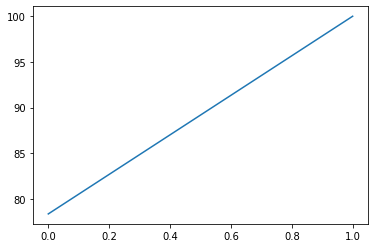

In [ ]:
import matplotlib.pyplot as plt
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [ ]:
'''import cv2
import numpy as np

img1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Tomato___healthy/1.jpg',0)
img2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Tomato___healthy/2.jpg',0)

ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print (ret)'''

In [ ]:
"""""import os
import cv2
def bg_sub(filename):
    test_img_path = "/content/drive/My Drive/Colab Notebooks/" + filename
    print(os.listdir("/content/drive/My Drive/Colab Notebooks/"))
    main_img = cv2.imread(test_img_path)
    if main_img is not None:
      img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
      #img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
      resized_image = cv2.resize(img, (1600, 1200))
      size_y,size_x,_ = img.shape
      gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
      blur = cv2.GaussianBlur(gs, (55,55),0)
      ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
      kernel = np.ones((50,50),np.uint8)
      closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
      
      contours,ret_image= cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
      
      contains = []
      y_ri,x_ri, _ = resized_image.shape
      for cc in contours:
          yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
          contains.append(yn)
      val = [contains.index(temp) for temp in contains if temp>0]
      index = val[0]
      
      black_img = np.empty([1200,1600,3],dtype=np.uint8)
      black_img.fill(0)
      
      cnt = contours[index]
      mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
      
      maskedImg = cv2.bitwise_and(resized_image, mask)
      white_pix = [255,255,255]
      black_pix = [0,0,0]
      
      final_img = maskedImg
      h,w,channels = final_img.shape
      for x in range(0,w):
          for y in range(0,h):
              channels_xy = final_img[y,x]
              if all(channels_xy == black_pix):
                  final_img[y,x] = white_pix
    
    return final_img
  
filename = 'F1.jpg' 
bg_rem_img = bg_sub(filename)"""""

In [ ]:
def feature_extract(Mimg):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    img = cv2.imread(Mimg)
    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    contours,image  = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours=sorted(contours,key=cv2.contourArea,reverse=True)
    cnt = contours[0]
    
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

features_of_img = feature_extract("/content/drive/My Drive/Colab Notebooks/2012.jpg")
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,99208.0,3279.342269,540,611,0.883797,3.32574,108.39938,175.420826,190.223094,205.129905,30.982869,50.419212,38.137563,27.287574,0.99239,0.581521,10.090243


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1)
print(X,y)

[[-7.0103078  -3.15929709]] [0]


In [ ]:
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,99208.0,3279.342269,540,611,0.883797,3.32574,108.39938,175.420826,190.223094,205.129905,30.982869,50.419212,38.137563,27.287574,0.99239,0.581521,10.090243


In [ ]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = clf.predict(scaled_features)
y_pred_mobile[0]

ValueError: ignored

In [ ]:

common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
print(len(common_names))               
common_names[y_pred_mobile[0]]

32


'Chinese horse chestnut'